In [6]:
from main import (
    general_describe,
    custom_describe,
    change_column_name,
    create_murder_histogram,
    create_line_chart,
    save_to_md,
)
import pandas as pd

data = "https://raw.githubusercontent.com/fivethirtyeight/data/master/murder_2016/murder_2015_final.csv"

In [7]:
# Test describe function is not none and the shape is correct:
def test_describe():
    description = general_describe(data)
    assert description is not None
    assert description.shape[0] > 0
    assert description.shape[1] > 0

In [8]:
# Test custom_describe function
def test_custom_describe():
    custom_test = custom_describe(data, "2014_murders")
    description = general_describe(data)
    assert description.loc["mean", "2014_murders"] == custom_test["mean"]
    assert description.loc["std", "2014_murders"] == custom_test["std"]
    assert description.loc["75%", "2014_murders"] == custom_test["75 quantile"]
    assert description.loc["min", "2014_murders"] == custom_test["min"]

In [9]:
# Test the change column name function:
def test_change_column_name():
    df = pd.read_csv(data)
    new_df = change_column_name(df, "change", "change in murders")
    assert "change in murders" in new_df.columns

In [10]:
# Test all the diagrams can displayed properly:
def test_diagrams():
    create_murder_histogram(data)
    create_line_chart(data)

In [11]:
# Test the diagrams can be saved to markdown:
def test_save_to_md():
    save_to_md(data)
    with open("report.md", "r") as file:
        content = file.read()
        assert "Describe:" in content, "Summary table is missing."
        assert (
            "![Histogram](Histogram_of_Murders_2014_2015.png)" in content
        ), "Histogram reference is missing."
        assert (
            "![Line Chart](Change_in_Murder_Rates_by_State_in_2015.png)" in content
        ), "Line Chart reference is missing."

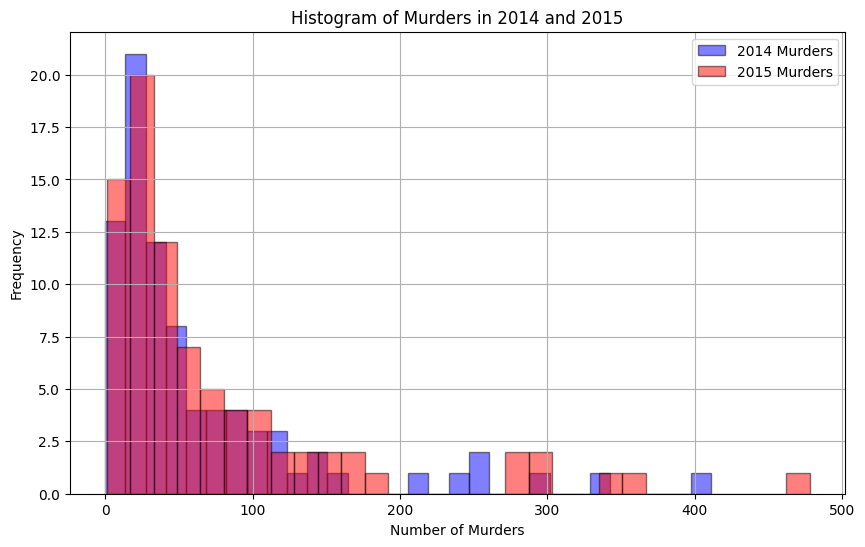

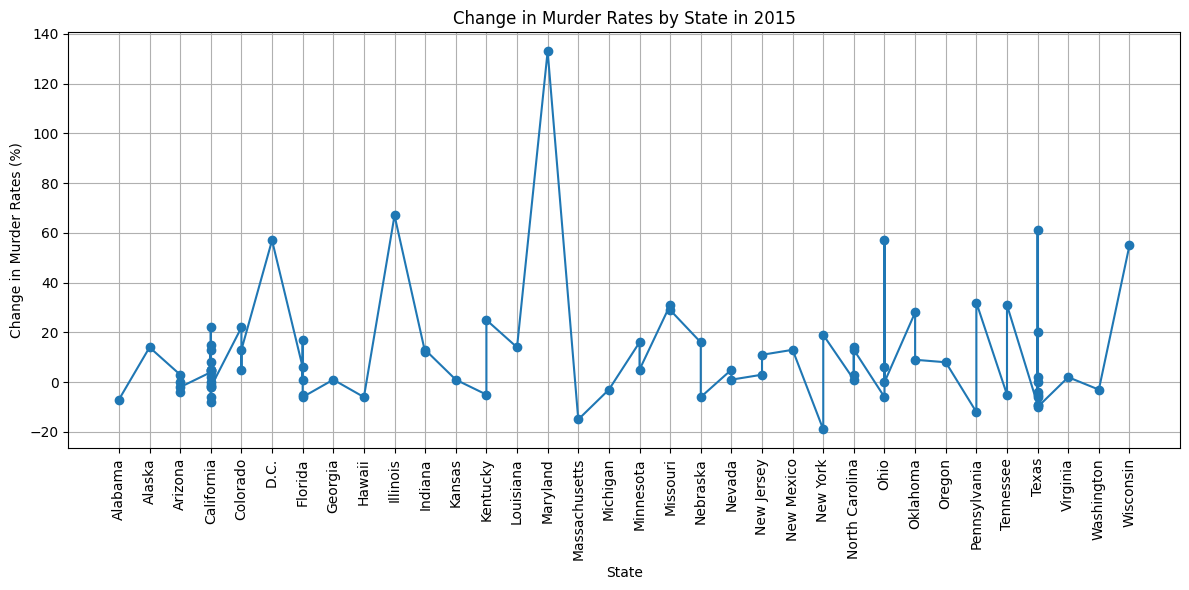

In [12]:
if __name__ == "__main__":
    test_describe()
    test_custom_describe()
    test_change_column_name()
    test_diagrams()
    test_save_to_md()